In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('1m_ta.csv')
df = df.drop(columns=['Unnamed: 0'], errors='ignore')
df = df.set_index('date')
df['return'] = df['close'].pct_change()
df = df.iloc[10000:]
nan_cols = df.columns[df.isna().any()]
df = df.drop(columns=nan_cols)
print(df.isna().sum().sum())


0


In [3]:
from sklearn.model_selection import train_test_split

# 目标变量

df['target'] = df['return'].shift(-1)  # 目标变量为下一时刻的 return
df = df.iloc[:-1, :]  # 删除最后一行，因为目标变量无法定义

# 删除无用列
drop_cols = ['Unnamed: 0', 'date']  # 根据实际情况修改
feature_cols = [c for c in df.columns if c not in drop_cols + ['target']]

# 特征和目标变量
X = df[feature_cols].values
y = df['target'].values

# 检查缺失值并填充（如果存在）
if np.isnan(X).sum() > 0 or np.isnan(y).sum() > 0:
    print("缺失值检测：发现缺失值，自动填充为均值。")
    X = np.nan_to_num(X, nan=np.nanmean(X))
    y = np.nan_to_num(y, nan=np.nanmean(y))

# 数据划分（先不处理特征）
N = len(df)
train_size = int(N * 0.7)
test_size = int(N * 0.15)
val_size = N - train_size - test_size

train_end = train_size
test_end = train_size + test_size

X_train = X[:train_end]
y_train = y[:train_end]

X_test = X[train_end:test_end]
y_test = y[train_end:test_end]

X_val = X[test_end:]
y_val = y[test_end:]

# 输出数据集大小
print(f"数据集大小：\n训练集: {len(X_train)}, 测试集: {len(X_test)}, 验证集: {len(X_val)}")

数据集大小：
训练集: 347844, 测试集: 74538, 验证集: 74538


c:\Apps\anacoda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


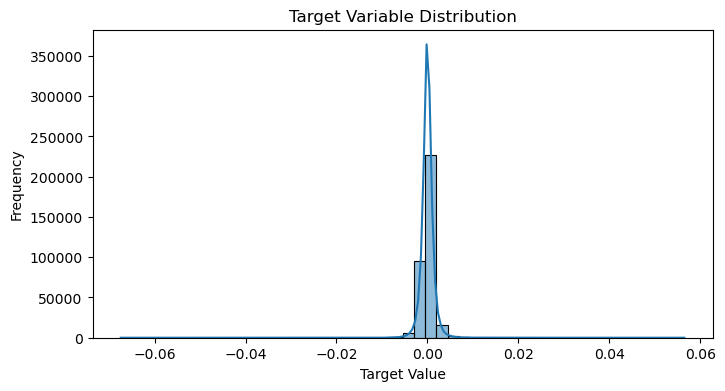

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# 目标变量分布
plt.figure(figsize=(8, 4))
sns.histplot(y_train, kde=True, bins=50)
plt.title("Target Variable Distribution")
plt.xlabel("Target Value")
plt.ylabel("Frequency")
plt.show()

In [5]:
X_train_df = pd.DataFrame(X_train, columns=feature_cols)

# 打印特征列名
print("Feature columns in X:")
print(feature_cols)

# 添加目标变量到 DataFrame 中，方便计算相关性
X_train_df['target'] = y_train

# 计算相关系数矩阵
correlation_matrix = X_train_df.corr(method='pearson')  # Pearson 相关系数
correlations_with_target = correlation_matrix['target'].drop('target')  # 取出与目标变量的相关性

# 按相关性排序
correlations_sorted = correlations_with_target.sort_values(ascending=False)

Feature columns in X:
['open', 'high', 'low', 'close', 'volume', 'return', 'RSI_14', 'RSI_7', 'STOCHk_14_3_3', 'STOCHd_14_3_3', 'STOCHRSIk_14_14_3_3', 'STOCHRSId_14_14_3_3', 'MACD_12_26_9', 'MACDh_12_26_9', 'MACDs_12_26_9', 'PPO_12_26_9', 'PPOh_12_26_9', 'PPOs_12_26_9', 'PVO_12_26_9', 'PVOh_12_26_9', 'PVOs_12_26_9', 'AO_5_34', 'MFI_14', 'CMF_20', 'OBV', 'AD', 'EOM_14_100000000', 'ROC_10', 'MOM_10', 'CCI_20_0.015', 'WILLR_14', 'AROOND_14', 'AROONU_14', 'AROONOSC_14', 'CHOP_14_1_100', 'ADX_14', 'DMP_14', 'DMN_14', 'TRIX_14_9', 'TRIXs_14_9', 'KST_10_15_20_30_10_10_10_15', 'KSTs_9', 'TSI_13_25_13', 'TSIs_13_25_13', 'FISHERT_9_1', 'FISHERTs_9_1', 'UO_7_14_28', 'RVI_14', 'ATRr_14', 'BBL_20_2.0', 'BBM_20_2.0', 'BBU_20_2.0', 'BBB_20_2.0', 'BBP_20_2.0', 'KCLe_20_2', 'KCBe_20_2', 'KCUe_20_2', 'DCL_20_20', 'DCM_20_20', 'DCU_20_20', 'PSARaf_0.02_0.2', 'PSARr_0.02_0.2', 'SUPERT_10_3.0', 'SUPERTd_10_3.0', 'ISA_9', 'ISB_26', 'ITS_9', 'IKS_26', 'LR_14', 'EMA_200', 'EMA_50', 'EMA_21', 'SMA_200', 'SMA_5

In [6]:
correlations_sorted = correlations_with_target.sort_values(ascending=False)

# 打印前 10 个最相关的特征
print("\nTop 10 Features Correlated with Target:")
print(correlations_sorted.head(10))

# 打印前 10 个最不相关的特征
print("\nBottom 10 Features Correlated with Target:")
print(correlations_sorted.tail(10))


Top 10 Features Correlated with Target:
volume             0.018433
BBB_20_2.0         0.016040
ATRr_14            0.010412
PVO_12_26_9        0.007040
DMN_14             0.006741
PVOs_12_26_9       0.005333
PVOh_12_26_9       0.005168
AROOND_14          0.004009
ADX_14             0.003943
PSARaf_0.02_0.2    0.003368
Name: target, dtype: float64

Bottom 10 Features Correlated with Target:
KST_10_15_20_30_10_10_10_15   -0.006936
TRIX_14_9                     -0.007350
PPO_12_26_9                   -0.008225
PPOh_12_26_9                  -0.008754
MACD_12_26_9                  -0.009803
AO_5_34                       -0.011062
MACDh_12_26_9                 -0.012143
return                        -0.014340
MOM_10                        -0.017034
ROC_10                        -0.019083
Name: target, dtype: float64


In [7]:
X_train_df = X_train_df.drop(columns=['FISHERT_9_1', 'FISHERTs_9_1'], errors='ignore')


In [8]:
# 删除多重共线性特征函数
def remove_multicollinearity(dataframe, threshold=0.9):
    """
    删除具有多重共线性的特征
    参数：
        dataframe: 包含特征的 DataFrame
        threshold: 相关性绝对值的阈值，默认是 0.9
    返回：
        删除多重共线性特征后的 DataFrame
    """
    corr_matrix = dataframe.corr().abs()  # 计算相关性矩阵
    upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))  # 上三角矩阵
    
    # 查找相关性高于阈值的特征（只保留一个）
    to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > threshold)]
    print(f"Columns to drop due to multicollinearity: {to_drop}")
    
    # 删除多重共线性特征
    return dataframe.drop(columns=to_drop, errors='ignore')

# 从 df 中删除多重共线性的特征列
feature_cols = [c for c in df.columns if c not in ['target']]  # 保留特征列
df_filtered = remove_multicollinearity(df[feature_cols], threshold=0.9)

# 再次计算与目标变量的相关性
df_filtered['target'] = df['target']  # 添加目标列
correlations = df_filtered.corr(method='pearson')['target'].drop('target')

# 保留与目标变量绝对相关性大于 0.3 的列
selected_features = correlations[correlations.abs() > 0.001].index.tolist()
print(f"Selected features (|correlation| > 0.005): {selected_features}")

# 提取筛选后的特征列
df_filtered = df_filtered[selected_features + ['target']]

Columns to drop due to multicollinearity: ['high', 'low', 'close', 'RSI_7', 'STOCHd_14_3_3', 'STOCHRSId_14_14_3_3', 'MACDs_12_26_9', 'PPOs_12_26_9', 'AO_5_34', 'MOM_10', 'CCI_20_0.015', 'WILLR_14', 'TRIX_14_9', 'TRIXs_14_9', 'KST_10_15_20_30_10_10_10_15', 'KSTs_9', 'TSIs_13_25_13', 'FISHERT_9_1', 'FISHERTs_9_1', 'BBL_20_2.0', 'BBM_20_2.0', 'BBU_20_2.0', 'BBP_20_2.0', 'KCLe_20_2', 'KCBe_20_2', 'KCUe_20_2', 'DCL_20_20', 'DCM_20_20', 'DCU_20_20', 'SUPERT_10_3.0', 'ISA_9', 'ISB_26', 'ITS_9', 'IKS_26', 'LR_14', 'EMA_200', 'EMA_50', 'EMA_21', 'SMA_200', 'SMA_50', 'SMA_21', 'DEMA_14', 'TEMA_14', 'WMA_14', 'HMA_14', 'T3_14_0.7']
Selected features (|correlation| > 0.005): ['open', 'volume', 'return', 'RSI_14', 'MACD_12_26_9', 'MACDh_12_26_9', 'PPO_12_26_9', 'PPOh_12_26_9', 'PVO_12_26_9', 'PVOh_12_26_9', 'PVOs_12_26_9', 'MFI_14', 'CMF_20', 'AD', 'EOM_14_100000000', 'ROC_10', 'AROOND_14', 'AROONU_14', 'AROONOSC_14', 'CHOP_14_1_100', 'ADX_14', 'DMP_14', 'DMN_14', 'TSI_13_25_13', 'UO_7_14_28', 'RVI

In [9]:
X = df_filtered.drop(columns=['target']).values
y = df_filtered['target'].values

N = len(df_filtered)
train_size = int(N * 0.7)
test_size = int(N * 0.15)

train_end = train_size
test_end = train_size + test_size

X_train = X[:train_end]
y_train = y[:train_end]

X_test = X[train_end:test_end]
y_test = y[train_end:test_end]

X_val = X[test_end:]
y_val = y[test_end:]

print(f"数据集大小：\n训练集: {len(X_train)}, 测试集: {len(X_test)}, 验证集: {len(X_val)}")
print(f"最终保留的特征列：{selected_features}")

数据集大小：
训练集: 347844, 测试集: 74538, 验证集: 74538
最终保留的特征列：['open', 'volume', 'return', 'RSI_14', 'MACD_12_26_9', 'MACDh_12_26_9', 'PPO_12_26_9', 'PPOh_12_26_9', 'PVO_12_26_9', 'PVOh_12_26_9', 'PVOs_12_26_9', 'MFI_14', 'CMF_20', 'AD', 'EOM_14_100000000', 'ROC_10', 'AROOND_14', 'AROONU_14', 'AROONOSC_14', 'CHOP_14_1_100', 'ADX_14', 'DMP_14', 'DMN_14', 'TSI_13_25_13', 'UO_7_14_28', 'RVI_14', 'ATRr_14', 'BBB_20_2.0', 'PSARaf_0.02_0.2', 'PSARr_0.02_0.2', 'SUPERTd_10_3.0']


In [1]:
# 转换保留的特征为 DataFrame
X_train_filtered = pd.DataFrame(X_train, columns=selected_features)

# 打印统计信息
print("统计特征分析：")
print(X_train_filtered.describe())

NameError: name 'pd' is not defined

Feature scaling completed. Example scaled data:
       open    volume    return    RSI_14  MACD_12_26_9  MACDh_12_26_9  \
0 -1.691028 -0.131491  1.484024  0.411590     -0.265683       0.452760   
1 -1.683939 -0.190616 -0.816611  0.032597     -0.219161       0.485473   
2 -1.687838  0.429062  1.334231  0.563254     -0.114985       0.664408   
3 -1.681458 -0.088484 -0.519776  0.322113     -0.057475       0.683909   
4 -1.683939 -0.150846  0.220987  0.411247     -0.000921       0.696974   

   PPO_12_26_9  PPOh_12_26_9  PVO_12_26_9  PVOh_12_26_9  ...    DMP_14  \
0    -0.498983      0.251472    -0.949760     -0.690092  ... -0.145091   
1    -0.512444      0.173635    -0.963415     -0.572414  ... -0.277180   
2    -0.453211      0.260091    -0.448259      0.309402  ...  0.335841   
3    -0.285947      0.550275    -0.455630      0.236542  ...  0.209191   
4    -0.153121      0.711967    -0.506046      0.114136  ...  0.120022   

     DMN_14  TSI_13_25_13  UO_7_14_28    RVI_14   ATRr_14  BBB

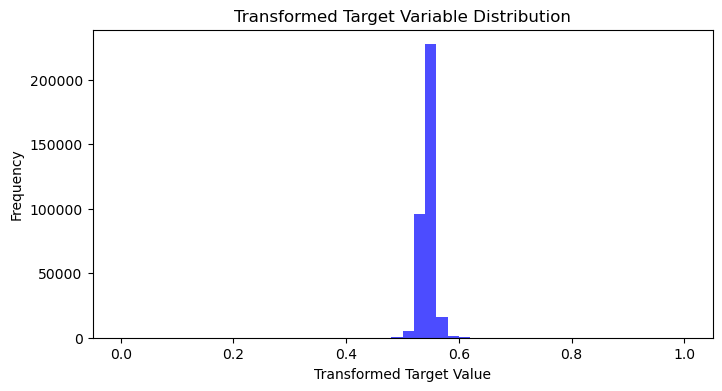

In [12]:

# 不进行归一化或标准化，直接使用原始数据
X_train_df = pd.DataFrame(X_train, columns=selected_features)
X_val_df = pd.DataFrame(X_val, columns=selected_features)
X_test_df = pd.DataFrame(X_test, columns=selected_features)

# 将目标值加入对应的 DataFrame
X_train_df['target'] = y_train
X_val_df['target'] = y_val
X_test_df['target'] = y_test

# 保存到 CSV 文件
train_file_path = "Xy_train.csv"
val_file_path = "Xy_val.csv"
test_file_path = "Xy_test.csv"

X_train_df.to_csv(train_file_path, index=False)
X_val_df.to_csv(val_file_path, index=False)
X_test_df.to_csv(test_file_path, index=False)

print("CSV files saved without normalization.")